## First Go at Classification Using a Convolutional Neural Network

In our EDA, we saw that there is a variety of sizes, color modes, and class sizes within our dataset. This means we will likely need to do some preprocessing on our data before creating a classification algorithm. Luckily, TensorFlow has many in-built functions which take care of most of these steps for us. Before adding augmentation, it is good to perform a baseline test of how well a classification model performs on a dataset. Let's now go ahead and create a simple convolutional neural network using TensorFlow!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
!ls

CNN_classifier.ipynb         architectural-styles-dataset
EDA.ipynb                    rgb-dataset
README.md                    rgb_dataset
arcDataset


First of all, let's load up the data using a Keras utility.

In [3]:
batch_size = 64
img_height = 800
img_width = 800
data_dir = 'architectural-styles-dataset'

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10113 files belonging to 25 classes.
Using 8091 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10113 files belonging to 25 classes.
Using 2022 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


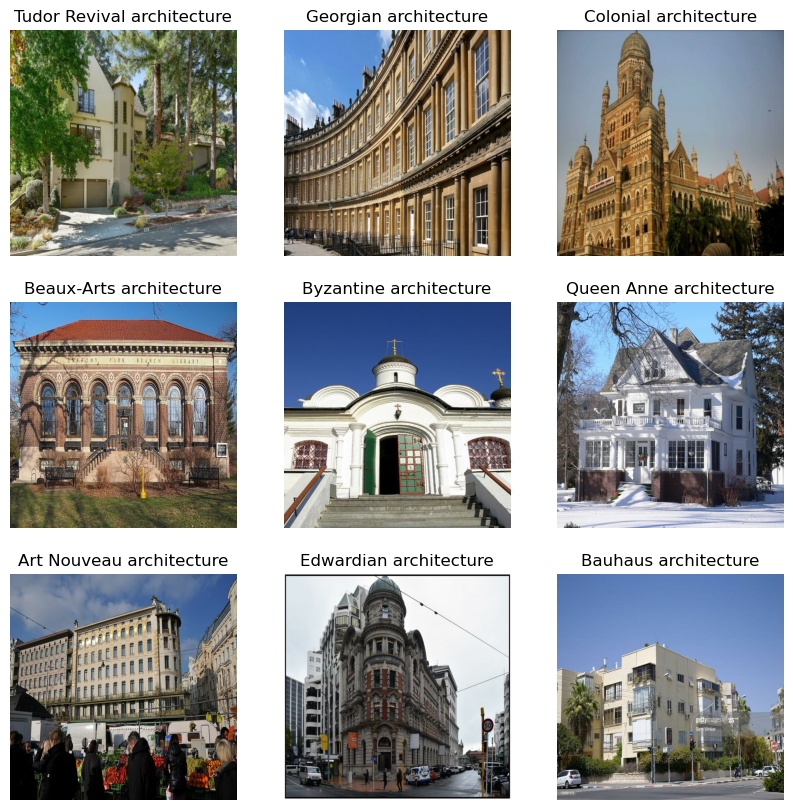

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(4):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
batch_size = 4
img_height = 800
img_width = 800
data_dir = 'rgb-dataset'

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1337,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10113 files belonging to 25 classes.
Using 8091 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1337,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10113 files belonging to 25 classes.
Using 2022 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.AveragePooling2D(2),
  layers.Activation('sigmoid'),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.AveragePooling2D(2),
  layers.Activation('sigmoid'),
  layers.Conv2D(120, 5, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(84, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 800, 800, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 800, 800, 16)      1216      
                                                                 
 average_pooling2d (Average  (None, 400, 400, 16)      0         
 Pooling2D)                                                      
                                                                 
 activation (Activation)     (None, 400, 400, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 400, 400, 32)      12832     
                                                                 
 average_pooling2d_1 (Avera  (None, 200, 200, 32)      0         
 gePooling2D)                                           

In [20]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
   8/2023 [..............................] - ETA: 18:07:26 - loss: 319.2308 - accuracy: 0.0938

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that the training loss consistenly decreases while training accuracy increases. This is exactly what we hope to achieve in machine learning! However, we can also see that the story is very different for our validation data. The validation accuracy stays flat while the loss keeps increasing. So what is going on? Well, this is a problem known as overfitting. This indicates that while the model can learn to classify images in the training dataset very well, it is unable to generalize to images it has not seen before. This indicates that we should explore techniques to avoid this, and luckily TensorFlow has many functions that can do this for us!